In [9]:
import torch
import numpy as np

In [51]:
print("PyTorch Version:", torch.__version__)

PyTorch Version: 2.1.0.dev20230801


In [10]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [11]:
# grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

In [12]:
# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

In [13]:
# transfer to the GPU device
x = x.to(device)
y = y.to(device)

In [14]:
# Compute Gaussian
z = torch.exp(-(x**2+y**2)/2.0)

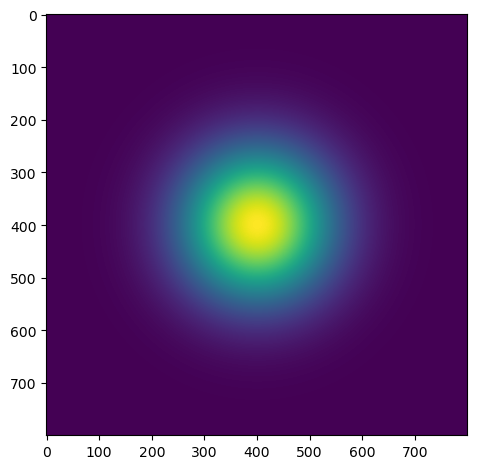

In [15]:
#plot
import matplotlib.pyplot as plt
plt.imshow(z.numpy())
plt.tight_layout()
plt.show()

In [16]:
z = torch.sin(x+y)

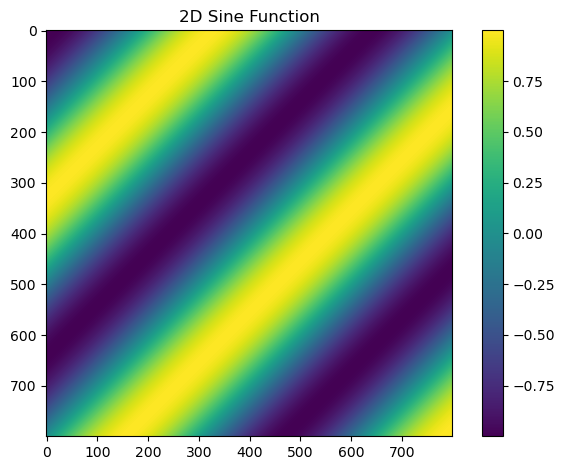

In [17]:
plt.imshow(z.cpu().numpy())
plt.title("2D Sine Function")
plt.colorbar()
plt.tight_layout()
plt.show()

In [18]:
# Compute Gaussian
z_gaussian = torch.exp(-(x**2 + y**2) / 2.0)
z_sine = torch.sin(x+y)
# Multiply Gaussian and 2D sine/cosine functions
z_modulated = z_gaussian * z_sine

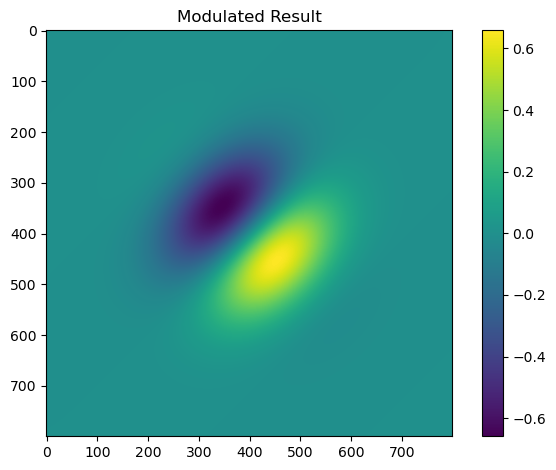

In [19]:
plt.imshow(z_modulated.cpu().numpy())
plt.title("Modulated Result")
plt.colorbar()
plt.tight_layout()
plt.show()

In [16]:
import torch
import numpy as np

In [18]:

# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]

In [19]:
# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = torch.zeros_like(z)
ns = torch.zeros_like(z)

In [20]:
# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

In [22]:
# Mandelbrot Set
for i in range(200):
    # Compute the new values of z: z^2 + z
    zs_ = zs*zs + z
    # Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    # Update variables to compute
    ns += not_diverged.type(torch.FloatTensor)
    zs = zs_


/var/folders/11/pc6314wx3hl3fwfhy_wb37lw0000gn/T/ipykernel_16024/1022592235.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


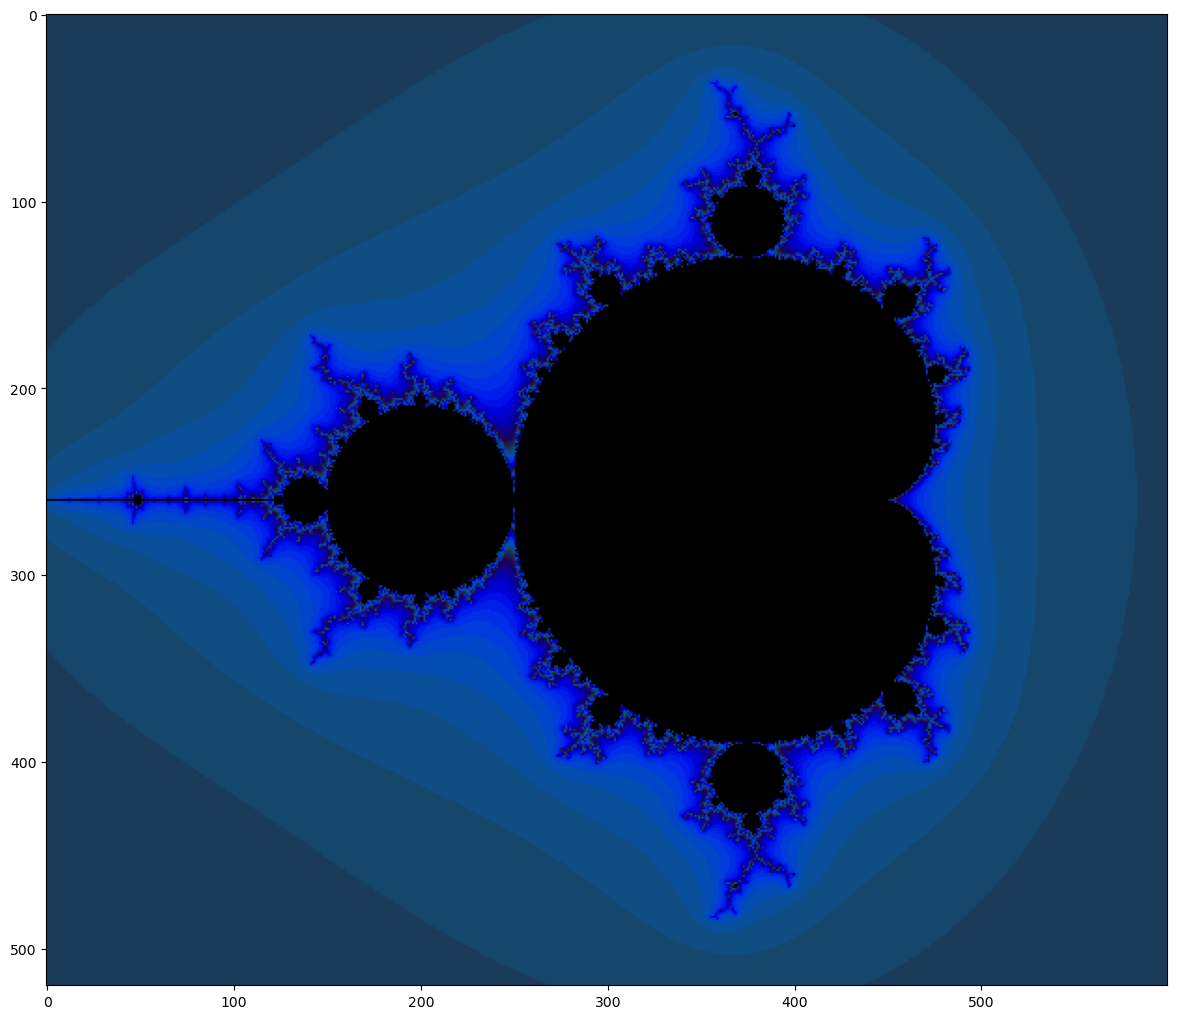

In [24]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 10))

def processFractal(a):
    a_cyclic = (6.28 * a / 20.0).reshape(list(a.shape) + [1])
    img = np.concatenate([10 + 20 * np.cos(a_cyclic),
                          30 + 50 * np.sin(a_cyclic),
                          155 - 80 * np.cos(a_cyclic)], 2)
    img[a == a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.numpy()))
plt.tight_layout(pad=0)
plt.show()


/var/folders/11/pc6314wx3hl3fwfhy_wb37lw0000gn/T/ipykernel_16024/2249120498.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


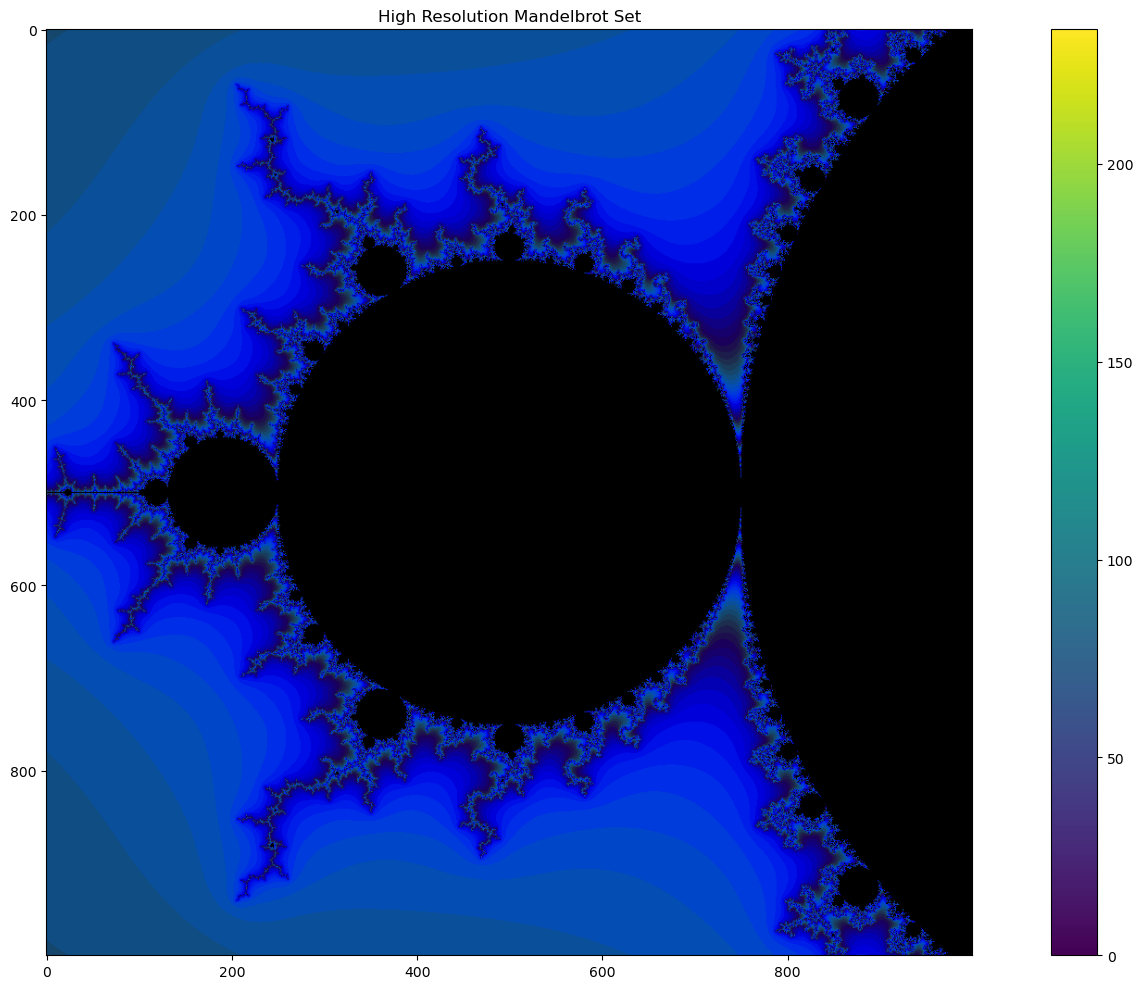

In [25]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Y, X = np.mgrid[-0.5:0.5:0.001, -1.5:-0.5:0.001]  
z = torch.complex(torch.Tensor(X), torch.Tensor(Y))

zs = torch.zeros_like(z)
ns = torch.zeros_like(z)

# Transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

# Mandelbrot Set
for i in range(200)
    zs_ = zs * zs + z
    not_diverged = torch.abs(zs_) < 4.0
    ns += not_diverged.type(torch.FloatTensor)
    zs = zs_


fig = plt.figure(figsize=(16, 10))

def processFractal(a):

    a_cyclic = (6.28 * a / 20.0).reshape(list(a.shape) + [1])
    img = np.concatenate([10 + 20 * np.cos(a_cyclic),
                          30 + 50 * np.sin(a_cyclic),
                          155 - 80 * np.cos(a_cyclic)], 2)
    img[a == a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.title("High Resolution Mandelbrot Set")
plt.colorbar()
plt.tight_layout()
plt.show()


/var/folders/11/pc6314wx3hl3fwfhy_wb37lw0000gn/T/ipykernel_18199/4025196149.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


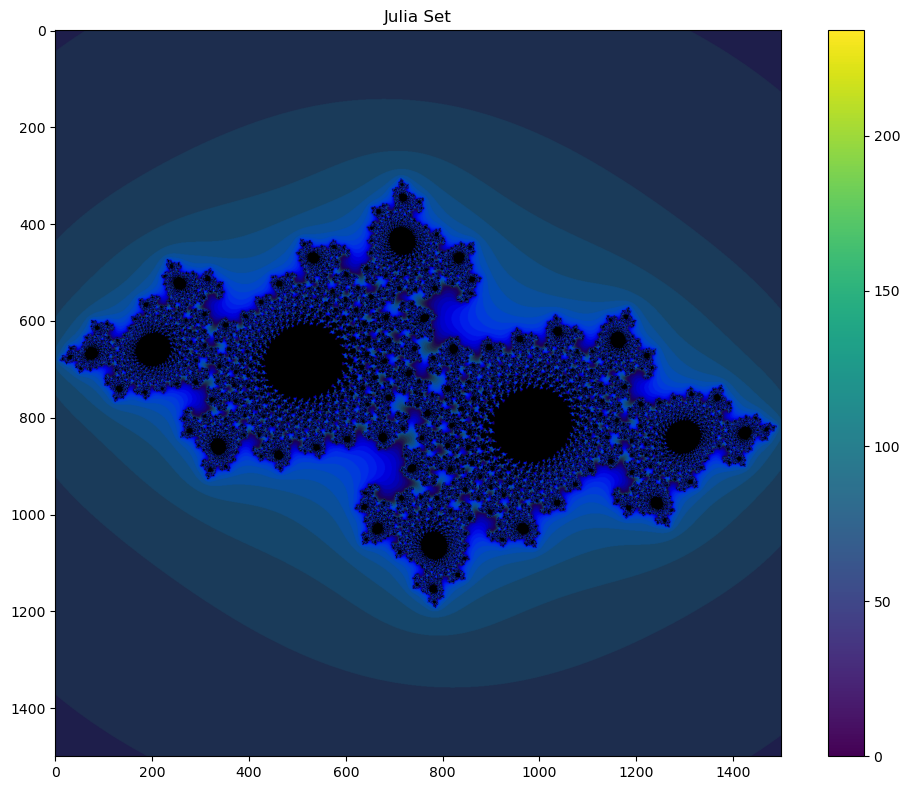

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Y, X = np.mgrid[-1.5:1.5:0.002, -1.5:1.5:0.002]  
z = torch.complex(torch.Tensor(X), torch.Tensor(Y))

c = torch.complex(torch.Tensor([-0.7]), torch.Tensor([-0.265]))

zs = z.to(device)
ns = torch.zeros_like(z).to(device)

# Julia Set
for i in range(200):
    zs = zs * zs + c
    not_diverged = torch.abs(zs) < 4.0
    ns += not_diverged.type(torch.FloatTensor)

# Plot Julia Set
fig = plt.figure(figsize=(10, 8))

def processFractal(a):
    
    a_cyclic = (6.28 * a / 20.0).reshape(list(a.shape) + [1])
    img = np.concatenate([10 + 20 * np.cos(a_cyclic),
                          30 + 50 * np.sin(a_cyclic),
                          155 - 80 * np.cos(a_cyclic)], 2)
    img[a == a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.title("Julia Set")
plt.colorbar()
plt.tight_layout()
plt.show()


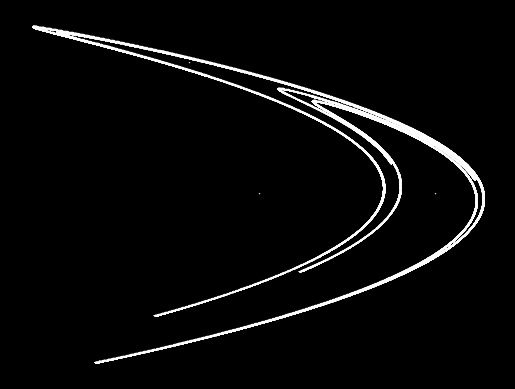

In [26]:
import torch
import matplotlib.pyplot as plt
plt.style.use('dark_background')

def henon_attractor(x, y, a=1.4, b=0.3):
    x_next = 1 - a * x ** 2 + y
    y_next = b * x
    return x_next, y_next

steps = 100000

X = torch.zeros(steps + 1)
Y = torch.zeros(steps + 1)
X[0], Y[0] = torch.tensor(0.0), torch.tensor(0.0)

for i in range(steps):
    X[i+1], Y[i+1] = henon_attractor(X[i], Y[i])

X_numpy = X.numpy()
Y_numpy = Y.numpy()


plt.plot(X_numpy, Y_numpy, '^', color='white', alpha=0.8, markersize=0.3)
plt.axis('off')
plt.show()
